In [1]:
#loading dataset
#row and column check
#column name check
#column datatype check
#null value check
#target column statistical description
#target column data distribution check
#correlation of numerical columns check
#distribution of target column (left skewed) check
#transforming into normal data distribution
#clean up of square-foot into single value
#clean up of city into single city Belo horizonte
#finding the NaN value of ADM-FEES
#Replacing ADM-FEES NaN values with the mean of respective Neighborhood using group by
#Dropping single NaN of ADM-FEES with condition
#Replacing DF with Normally Distributed Dataframe
#Garages and Room Type Changing From Object To Float
#label Encoding ( Catergorical To Numerical ) of Neighborhood Column
#Removing City & Address As It only has belle horizonte data
#Data Splitting into 80 & 20
#Applying Linear Regression
#Applying XGBoost
#Applying Catboost
#Hyper Tuning Using Grid Search CV in XGBoost, Catboost & Linear Regression
#Removing Latitude & Longitude From Data Frame
#Training Linear Regression, XGBoost & Catboost, performance did not increase

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Importing Data
df = pd.read_csv("Belo_Horizonte_Brazil_Dataset.csv")

In [4]:
df.shape
#5981 rows and 10 columns

(5981, 10)

In [5]:
#checking columns in the dataframe
print(df.columns)

Index(['address', 'adm-fees', 'garage-places', 'price', 'rooms', 'square-foot',
       'neighborhood', 'city', 'latitude', 'longitude'],
      dtype='object')


In [6]:
#checking datatypes of columns
print(df.dtypes)

address           object
adm-fees         float64
garage-places     object
price            float64
rooms             object
square-foot       object
neighborhood      object
city              object
latitude         float64
longitude        float64
dtype: object


In [7]:
#checking null values
print(df.isnull().sum())

address             0
adm-fees         2004
garage-places       0
price              30
rooms               0
square-foot         0
neighborhood       24
city                0
latitude            0
longitude           0
dtype: int64


In [8]:
#basic statistical description
df['price'].describe()

count    5.951000e+03
mean     1.075036e+06
std      2.127474e+06
min      4.500000e+02
25%      3.900000e+05
50%      6.800000e+05
75%      1.210000e+06
max      1.300000e+08
Name: price, dtype: float64

<AxesSubplot:>

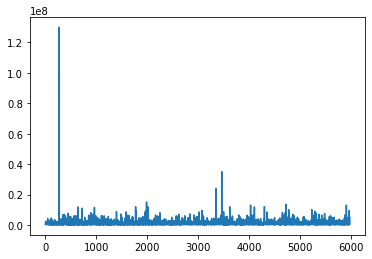

In [9]:
#distribution check of price column
df['price'].plot(kind='line')


<AxesSubplot:>

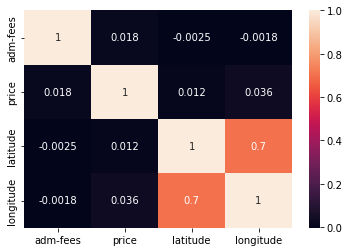

In [10]:
#correlation heatmap check
import seaborn as sns

sns.heatmap(df.corr(), annot=True)

/Users/sirajussalekin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

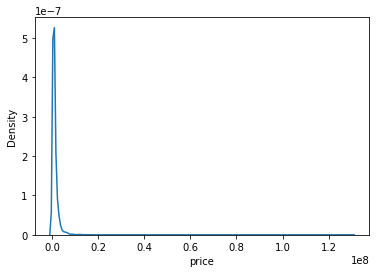

In [11]:
sns.distplot(df['price'],hist=False)

In [12]:
#transforming the data into normally distributed one
price_condition = (df['price'] >= 10_000) & (df['price']<= 1_000_000)

In [13]:
df[price_condition]

,address,adm-fees,garage-places,price,rooms,square-foot,neighborhood,city,latitude,longitude
0,"Avenida Raja Gabaglia, 1583",470.0,1,330000.0,1,40,Luxemburgo,Belo Horizonte,-19.936415,-43.953396
1,"Rua Espírito Santo, 1171",NaN,1,480000.0,2,45-65,Centro,Belo Horizonte,-18.864776,-41.121777
4,"Rua Juruna, 110",NaN,6,550000.0,3,278,Pindorama,Belo Horizonte,-19.912982,-44.019944
5,"Rua Maria Pereira de Araújo, 15",500.0,1,450000.0,3,87,Castelo,Belo Horizonte,-19.886147,-44.004236
6,"Rua Espírito Santo, 1580",NaN,2,861748.0,2,60-71,Centro,Belo Horizonte,-18.864776,-41.121777
...,...,...,...,...,...,...,...,...,...,...
5975,"Rua José Teófilo Marques, 10",200.0,--,220000.0,1,45,Buritis,Belo Horizonte,-19.974455,-43.977699
5976,Rua Gama Cerqueira,340.0,2,560000.0,3,92,Nova Suíssa,Belo Horizonte,-19.945428,-43.970988
5977,"Rua Arthur Lourenço, 262",200.0,1,440000.0,3,90,Barreiro,Belo Horizonte,-19.979915,-44.026007
5978,Rua General Ephigênio Ruas Santos,10.0,2,500000.0,3,80,Itapoã,Belo Horizonte,-19.840904,-43.956037


/Users/sirajussalekin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

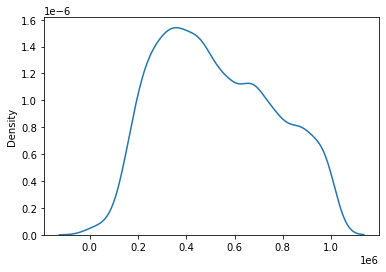

In [14]:
sns.distplot(df[price_condition][['price']],hist=False)

### Square Foot Clean Up

In [15]:
df['square-foot'].isna().sum()

0

In [16]:
df[df['square-foot'].str.contains('-')]

,address,adm-fees,garage-places,price,rooms,square-foot,neighborhood,city,latitude,longitude
1,"Rua Espírito Santo, 1171",NaN,1,480000.0,2,45-65,Centro,Belo Horizonte,-18.864776,-41.121777
6,"Rua Espírito Santo, 1580",NaN,2,861748.0,2,60-71,Centro,Belo Horizonte,-18.864776,-41.121777
13,"Rua Curitiba, 1677",NaN,2-3,826000.0,2,62-65,Lourdes,Belo Horizonte,-19.912231,-43.939663
35,"Rua Alvarenga Peixoto, 594",NaN,1,695416.0,1,39-48,Lourdes,Belo Horizonte,-19.929576,-43.949416
41,"Rua Alvarenga Peixoto, 425",NaN,2,969619.0,2-3,66-118,Lourdes,Belo Horizonte,-19.929576,-43.949416
...,...,...,...,...,...,...,...,...,...,...
520,"Rua Princesa Isabel, 190",NaN,1,146690.0,2,41-47,Chacaras Del Rey Sao Benedito,Santa Luzia,-19.883784,-43.935145
539,"Estrada de Areias, 221",NaN,--,NaN,--,250-1020,Esperanca Justinopolis,Ribeirão das Neves,-19.765255,-44.004707
544,"Avenida Diamante, 850",NaN,1,162490.0,2,41-48,Sapucaia II,Contagem,-19.888851,-44.111370
559,"Alameda de Rondon, 166",NaN,1,144490.0,2,41-47,Lundcea,Lagoa Santa,-19.633368,-43.914595


### Square Foot Clean Up

In [17]:
df[df['square-foot'].str.contains('^-', regex=True)]

,address,adm-fees,garage-places,price,rooms,square-foot,neighborhood,city,latitude,longitude
321,"Avenida dos Bandeirantes, 1.190",NaN,--,3900000.0,--,--,Comiteco,Belo Horizonte,-19.95723,-43.931973


In [18]:
x = '45-65'

def single_square_foot(x):
    if '-' in x:
        data = x.split('-')
        if(data[0] == ''):
            first_value = 0.0
        else:    
            first_value = float(data[0])
            
        if(data[1] == ''):
            second_value = 0.0
        else:    
            second_value = float(data[1])    
        mean_value = (first_value + second_value)/2
        return mean_value
    else:
        return float(x)
    
new_x = single_square_foot(x)  

print(new_x)

55.0


In [19]:
x = '45-65'
def single_square_foot(x):
    if str(x) == '--':
        return float(0)
    elif str(x) == 'nan':
            return float(0)
    elif '-' in x:
        number_x = [float(z) for z in x.split('-')]
        return sum(number_x)/len(number_x)
    else:
        return float(x)
        
    
new_x = single_square_foot(x)  

print(new_x)

55.0


In [20]:
dummy_square_foot = df['square-foot'].apply(single_square_foot)

In [21]:
df['square-foot'] = df['square-foot'].apply(single_square_foot)

In [22]:
print(dummy_square_foot)

0        40.0
1        55.0
2       411.0
3       158.0
4       278.0
        ...  
5976     92.0
5977     90.0
5978     80.0
5979     80.0
5980    428.0
Name: square-foot, Length: 5981, dtype: float64


In [23]:
df['square-foot'].unique()

array([4.0000e+01, 5.5000e+01, 4.1100e+02, 1.5800e+02, 2.7800e+02,
       8.7000e+01, 6.5500e+01, 1.5300e+02, 2.0000e+02, 5.7000e+02,
       7.4000e+01, 7.2000e+01, 2.5000e+02, 6.3500e+01, 1.0200e+02,
       5.2000e+01, 1.6000e+02, 2.1500e+02, 8.2000e+01, 9.0000e+01,
       5.4000e+01, 1.2700e+02, 1.4000e+02, 1.7800e+02, 2.5400e+02,
       1.2300e+02, 9.6000e+01, 1.1500e+02, 1.2000e+02, 8.0000e+01,
       4.3500e+01, 3.6000e+02, 9.2000e+01, 6.5000e+01, 1.1000e+02,
       1.3000e+02, 6.8000e+01, 1.0000e+02, 3.9100e+02, 1.0550e+02,
       9.3000e+01, 7.5000e+01, 1.0600e+02, 1.4500e+02, 6.6000e+01,
       4.3000e+01, 5.0000e+01, 1.4800e+02, 7.0000e+01, 5.6000e+01,
       1.0300e+02, 1.1050e+02, 6.2000e+01, 6.0000e+02, 3.7500e+02,
       1.4200e+02, 8.1000e+01, 1.0500e+02, 1.9000e+02, 1.1550e+02,
       1.0500e+03, 6.1000e+01, 1.4900e+02, 4.6000e+01, 1.3300e+02,
       1.2600e+02, 6.0000e+01, 4.3600e+02, 2.0800e+02, 6.4000e+01,
       8.9000e+01, 7.8500e+01, 9.5000e+01, 3.0000e+02, 8.5500e

### City Clean Up

In [24]:
df['city'].unique()

array([' Belo Horizonte ', 'Belo Horizonte', ' Nova Lima ', ' Contagem ',
       ' Ribeirão das Neves ', ' Santa Luzia ', ' Betim ',
       ' Lagoa Santa ', ' Km 480 ', ' Divinópolis ', ' 1122 ', ' Sabará ',
       ' 461 ', ' 1542 ', ' 570 ', ' 1601 ', ' São Paulo ', ' 22 ',
       ' 31 '], dtype=object)

In [25]:
city = ' Belo Horizonte 123'

def single_city(city):
    new_city = " ".join(city.split())
    for character in new_city:
            if character.isdigit():
                    return np.nan
    return new_city            
new_x = single_city(city)
print(new_x)

nan


In [26]:
dummy_city = df['city'].apply(single_city)
print(dummy_city)

0       Belo Horizonte
1       Belo Horizonte
2       Belo Horizonte
3       Belo Horizonte
4       Belo Horizonte
             ...      
5976    Belo Horizonte
5977    Belo Horizonte
5978    Belo Horizonte
5979    Belo Horizonte
5980    Belo Horizonte
Name: city, Length: 5981, dtype: object


In [27]:
dummy_city.unique()

array(['Belo Horizonte', 'Nova Lima', 'Contagem', 'Ribeirão das Neves',
       'Santa Luzia', 'Betim', 'Lagoa Santa', nan, 'Divinópolis',
       'Sabará', 'São Paulo'], dtype=object)

In [28]:
df['city'] = df['city'].apply(single_city)

In [29]:
df.city.value_counts()

Belo Horizonte        5949
Contagem                 6
Nova Lima                4
Sabará                   4
Ribeirão das Neves       3
Lagoa Santa              2
Santa Luzia              1
Betim                    1
Divinópolis              1
São Paulo                1
Name: city, dtype: int64

In [30]:
dummy_df = df[df['city'] == 'Belo Horizonte']

In [31]:
dummy_df.city.value_counts()

Belo Horizonte    5949
Name: city, dtype: int64

In [32]:
df = dummy_df

In [33]:
# dummy_square = df['square-foot'].apply(single_square_foot)

In [34]:
# df['square-foot'] =  df['square-foot'].apply(single_square_foot)

In [35]:
df.head()

,address,adm-fees,garage-places,price,rooms,square-foot,neighborhood,city,latitude,longitude
0,"Avenida Raja Gabaglia, 1583",470.0,1,330000.0,1,40.0,Luxemburgo,Belo Horizonte,-19.936415,-43.953396
1,"Rua Espírito Santo, 1171",NaN,1,480000.0,2,55.0,Centro,Belo Horizonte,-18.864776,-41.121777
2,"Rua dos Expedicionários, 1082",NaN,5,1190000.0,4,411.0,Santa Amélia,Belo Horizonte,-20.225241,-44.397780
3,"Rua Marechal Hermes, 81",750.0,4,1590000.0,4,158.0,Gutierrez,Belo Horizonte,-19.937155,-43.958694
4,"Rua Juruna, 110",NaN,6,550000.0,3,278.0,Pindorama,Belo Horizonte,-19.912982,-44.019944


In [36]:
df[df['adm-fees'].isna()].neighborhood.value_counts()
#nan value filled neighborhood counts

 Lourdes                   104
 Funcionários               88
 Savassi                    83
 Buritis                    80
 Santa Efigênia             73
                          ... 
 Visconde do Rio Branco      1
 Providência                 1
 Cenaculo                    1
 Miramar                     1
 Monsenhor Messias           1
Name: neighborhood, Length: 187, dtype: int64

### Clean Neighborhood

In [37]:
df.neighborhood.isna().sum()

24

In [38]:
df.neighborhood.unique()

array([' Luxemburgo', ' Centro', ' Santa Amélia', ' Gutierrez',
       ' Pindorama', ' Castelo', ' Santo Antônio', ' Sagrada Família',
       ' Sion', ' Lourdes', ' Santa Efigênia', ' Santa Tereza',
       ' Nova Gameleira', ' São João Batista', ' Nova Suíssa',
       ' São Gabriel', ' Ouro Preto', ' Alto Barroca', ' Goiânia',
       ' Maria Helena', ' Belvedere', ' Cidade Nova', ' Vitória',
       ' Savassi', ' João Pinheiro', ' Itapoã', ' São Tomaz',
       ' Boa Vista', ' Prado', nan, ' Santa Branca', ' São Pedro',
       ' Barro Preto', ' Buritis', ' Colégio Batista', ' Serra',
       ' Santo Agostinho', ' Horto', ' Funcionários', ' Califórnia',
       ' Granja De Freitas', ' Braúnas', ' São Lucas',
       ' Coração Eucarístico', ' Serrano', ' Anchieta', ' Cruzeiro',
       ' Caiçara Adeláide', ' Santa Cruz', ' Vila Paris', ' Gameleira',
       ' São José', ' Mantiqueira', ' Diamante', ' Grajaú',
       ' Santa Lúcia', ' Ipiranga', ' Planalto', ' Barreiro',
       ' São Bento', ' P

In [39]:
def single_neighborhood(neighbor):
    if str(neighbor) == 'nan':
        return 'UNKNOWN'
    new_neighbor = " ".join(neighbor.split())
    for character in new_neighbor:
            if character.isdigit():
                    return np.nan
    return new_neighbor     

In [40]:
df['neighborhood'] = df['neighborhood'].apply(single_neighborhood)

In [41]:
df.neighborhood.unique()

array(['Luxemburgo', 'Centro', 'Santa Amélia', 'Gutierrez', 'Pindorama',
       'Castelo', 'Santo Antônio', 'Sagrada Família', 'Sion', 'Lourdes',
       'Santa Efigênia', 'Santa Tereza', 'Nova Gameleira',
       'São João Batista', 'Nova Suíssa', 'São Gabriel', 'Ouro Preto',
       'Alto Barroca', 'Goiânia', 'Maria Helena', 'Belvedere',
       'Cidade Nova', 'Vitória', 'Savassi', 'João Pinheiro', 'Itapoã',
       'São Tomaz', 'Boa Vista', 'Prado', 'UNKNOWN', 'Santa Branca',
       'São Pedro', 'Barro Preto', 'Buritis', 'Colégio Batista', 'Serra',
       'Santo Agostinho', 'Horto', 'Funcionários', 'Califórnia',
       'Granja De Freitas', 'Braúnas', 'São Lucas', 'Coração Eucarístico',
       'Serrano', 'Anchieta', 'Cruzeiro', 'Caiçara Adeláide',
       'Santa Cruz', 'Vila Paris', 'Gameleira', 'São José', 'Mantiqueira',
       'Diamante', 'Grajaú', 'Santa Lúcia', 'Ipiranga', 'Planalto',
       'Barreiro', 'São Bento', 'Pampulha', 'Jardim dos Comerciários',
       'Bandeirantes', 'Candela

### For each Group we are filling the selected groups Nan value with the groups mean value

In [42]:
df['adm-fees'] = df['adm-fees'].fillna(df.groupby('neighborhood')['adm-fees'].transform('mean'))

In [43]:
condition = df['adm-fees'].isna()
df = df[~condition]

In [44]:
df.isna().sum()

address           0
adm-fees          0
garage-places     0
price            24
rooms             0
square-foot       0
neighborhood      0
city              0
latitude          0
longitude         0
dtype: int64

In [45]:
df[price_condition]

/var/folders/h6/8r6f_lmx5lg2nq9hn36037600000gn/T/ipykernel_65558/3308309468.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[price_condition]


,address,adm-fees,garage-places,price,rooms,square-foot,neighborhood,city,latitude,longitude
0,"Avenida Raja Gabaglia, 1583",470.00000,1,330000.0,1,40.0,Luxemburgo,Belo Horizonte,-19.936415,-43.953396
1,"Rua Espírito Santo, 1171",594.12381,1,480000.0,2,55.0,Centro,Belo Horizonte,-18.864776,-41.121777
5,"Rua Maria Pereira de Araújo, 15",500.00000,1,450000.0,3,87.0,Castelo,Belo Horizonte,-19.886147,-44.004236
6,"Rua Espírito Santo, 1580",594.12381,2,861748.0,2,65.5,Centro,Belo Horizonte,-18.864776,-41.121777
7,"Rua Matipó, 455",750.00000,2,549900.0,4,153.0,Santo Antônio,Belo Horizonte,-19.947351,-43.943470
...,...,...,...,...,...,...,...,...,...,...
5975,"Rua José Teófilo Marques, 10",200.00000,--,220000.0,1,45.0,Buritis,Belo Horizonte,-19.974455,-43.977699
5976,Rua Gama Cerqueira,340.00000,2,560000.0,3,92.0,Nova Suíssa,Belo Horizonte,-19.945428,-43.970988
5977,"Rua Arthur Lourenço, 262",200.00000,1,440000.0,3,90.0,Barreiro,Belo Horizonte,-19.979915,-44.026007
5978,Rua General Ephigênio Ruas Santos,10.00000,2,500000.0,3,80.0,Itapoã,Belo Horizonte,-19.840904,-43.956037


In [46]:
df = df[price_condition]

/var/folders/h6/8r6f_lmx5lg2nq9hn36037600000gn/T/ipykernel_65558/746009070.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[price_condition]


In [47]:
df 

,address,adm-fees,garage-places,price,rooms,square-foot,neighborhood,city,latitude,longitude
0,"Avenida Raja Gabaglia, 1583",470.00000,1,330000.0,1,40.0,Luxemburgo,Belo Horizonte,-19.936415,-43.953396
1,"Rua Espírito Santo, 1171",594.12381,1,480000.0,2,55.0,Centro,Belo Horizonte,-18.864776,-41.121777
5,"Rua Maria Pereira de Araújo, 15",500.00000,1,450000.0,3,87.0,Castelo,Belo Horizonte,-19.886147,-44.004236
6,"Rua Espírito Santo, 1580",594.12381,2,861748.0,2,65.5,Centro,Belo Horizonte,-18.864776,-41.121777
7,"Rua Matipó, 455",750.00000,2,549900.0,4,153.0,Santo Antônio,Belo Horizonte,-19.947351,-43.943470
...,...,...,...,...,...,...,...,...,...,...
5975,"Rua José Teófilo Marques, 10",200.00000,--,220000.0,1,45.0,Buritis,Belo Horizonte,-19.974455,-43.977699
5976,Rua Gama Cerqueira,340.00000,2,560000.0,3,92.0,Nova Suíssa,Belo Horizonte,-19.945428,-43.970988
5977,"Rua Arthur Lourenço, 262",200.00000,1,440000.0,3,90.0,Barreiro,Belo Horizonte,-19.979915,-44.026007
5978,Rua General Ephigênio Ruas Santos,10.00000,2,500000.0,3,80.0,Itapoã,Belo Horizonte,-19.840904,-43.956037


### Garage & Room Type Changing from object to int

In [48]:
df['garage-places'].unique()

array(['1', '2', '3', '2-3', '--', '1-2', '4', '7', '2-4', '6', '8', '5',
       '10', '18', '25', '40', '22', '12', '11'], dtype=object)

In [49]:
# condition = df['garage-places'] != '3-4'
# df = df[~condition]
df.head()

,address,adm-fees,garage-places,price,rooms,square-foot,neighborhood,city,latitude,longitude
0,"Avenida Raja Gabaglia, 1583",470.00000,1,330000.0,1,40.0,Luxemburgo,Belo Horizonte,-19.936415,-43.953396
1,"Rua Espírito Santo, 1171",594.12381,1,480000.0,2,55.0,Centro,Belo Horizonte,-18.864776,-41.121777
5,"Rua Maria Pereira de Araújo, 15",500.00000,1,450000.0,3,87.0,Castelo,Belo Horizonte,-19.886147,-44.004236
6,"Rua Espírito Santo, 1580",594.12381,2,861748.0,2,65.5,Centro,Belo Horizonte,-18.864776,-41.121777
7,"Rua Matipó, 455",750.00000,2,549900.0,4,153.0,Santo Antônio,Belo Horizonte,-19.947351,-43.943470


In [50]:
row = df[df['garage-places'] == '2-3']

In [51]:
row

,address,adm-fees,garage-places,price,rooms,square-foot,neighborhood,city,latitude,longitude
13,"Rua Curitiba, 1677",1405.067742,2-3,826000.0,2,63.5,Lourdes,Belo Horizonte,-19.912231,-43.939663
199,Rua Rádio,520.269231,2-3,528600.0,2-3,73.0,São Lucas,Belo Horizonte,-19.933145,-43.919138
276,"Rua Rio Negro, 820",300.000000,2-3,548000.0,3,77.0,Barroca,Belo Horizonte,-19.929059,-43.966103


In [52]:
def single_garage_place(x):
    if str(x) == '--':
        return float(0)
    elif str(x) == 'nan':
            return float(0)
    elif '-' in str(x):
        return float(x[0])
    else:
        return float(x)

In [53]:
df['garage-places'] = df['garage-places'].apply(single_garage_place)

In [54]:
df['garage-places'].unique()

array([ 1.,  2.,  3.,  0.,  4.,  7.,  6.,  8.,  5., 10., 18., 25., 40.,
       22., 12., 11.])

In [55]:
df['garage-places'].isna().sum()

0

In [56]:
df

,address,adm-fees,garage-places,price,rooms,square-foot,neighborhood,city,latitude,longitude
0,"Avenida Raja Gabaglia, 1583",470.00000,1.0,330000.0,1,40.0,Luxemburgo,Belo Horizonte,-19.936415,-43.953396
1,"Rua Espírito Santo, 1171",594.12381,1.0,480000.0,2,55.0,Centro,Belo Horizonte,-18.864776,-41.121777
5,"Rua Maria Pereira de Araújo, 15",500.00000,1.0,450000.0,3,87.0,Castelo,Belo Horizonte,-19.886147,-44.004236
6,"Rua Espírito Santo, 1580",594.12381,2.0,861748.0,2,65.5,Centro,Belo Horizonte,-18.864776,-41.121777
7,"Rua Matipó, 455",750.00000,2.0,549900.0,4,153.0,Santo Antônio,Belo Horizonte,-19.947351,-43.943470
...,...,...,...,...,...,...,...,...,...,...
5975,"Rua José Teófilo Marques, 10",200.00000,0.0,220000.0,1,45.0,Buritis,Belo Horizonte,-19.974455,-43.977699
5976,Rua Gama Cerqueira,340.00000,2.0,560000.0,3,92.0,Nova Suíssa,Belo Horizonte,-19.945428,-43.970988
5977,"Rua Arthur Lourenço, 262",200.00000,1.0,440000.0,3,90.0,Barreiro,Belo Horizonte,-19.979915,-44.026007
5978,Rua General Ephigênio Ruas Santos,10.00000,2.0,500000.0,3,80.0,Itapoã,Belo Horizonte,-19.840904,-43.956037


In [57]:
df['rooms'].unique()

array(['1', '2', '3', '4', '5', '--', '2-3', '1-2', '7', '8', '6', '10'],
      dtype=object)

In [58]:
def single_room(x):
    if str(x) == '--':
        return float(0)
    elif str(x) == 'nan':
        return float(0)
    elif '-' in str(x):
        return float(x[0])
    else:
        return float(x)

In [59]:
df['rooms'] = df['rooms'].apply(single_room)

In [60]:
df.drop(columns=['address', 'city'], inplace=True)

In [61]:
df

,adm-fees,garage-places,price,rooms,square-foot,neighborhood,latitude,longitude
0,470.00000,1.0,330000.0,1.0,40.0,Luxemburgo,-19.936415,-43.953396
1,594.12381,1.0,480000.0,2.0,55.0,Centro,-18.864776,-41.121777
5,500.00000,1.0,450000.0,3.0,87.0,Castelo,-19.886147,-44.004236
6,594.12381,2.0,861748.0,2.0,65.5,Centro,-18.864776,-41.121777
7,750.00000,2.0,549900.0,4.0,153.0,Santo Antônio,-19.947351,-43.943470
...,...,...,...,...,...,...,...,...
5975,200.00000,0.0,220000.0,1.0,45.0,Buritis,-19.974455,-43.977699
5976,340.00000,2.0,560000.0,3.0,92.0,Nova Suíssa,-19.945428,-43.970988
5977,200.00000,1.0,440000.0,3.0,90.0,Barreiro,-19.979915,-44.026007
5978,10.00000,2.0,500000.0,3.0,80.0,Itapoã,-19.840904,-43.956037


/Users/sirajussalekin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

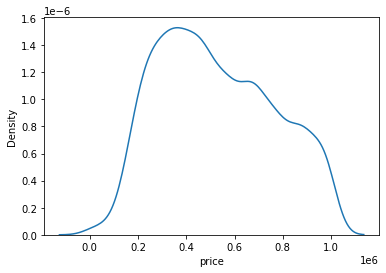

In [62]:
sns.distplot(df['price'],hist=False)

### Label Encoding In Neighborhood Column

In [63]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['neighborhood']= label_encoder.fit_transform(df['neighborhood'])

df['neighborhood'].unique()


array([ 91,  33,  31, 143, 129,  90, 134, 140, 104, 159, 106, 156, 110,
         1,  63,  97,  35, 145,  85,  72, 163,  12, 126, 167,  10, 132,
        17,  37, 142,  69,  22, 146, 162,  66,  42, 148, 131,   4,  44,
       133, 173,  60, 158,  95,  64,  71, 124,   7,  83, 151,  25,  59,
        13,   8,  96, 138, 170,  18, 111,  73, 168, 160,  46,  55,  89,
        78, 112,  39,  41,  56, 161,  92,  27,  48,  51, 107,  84,  34,
        67, 147,  52,  21,   9,  58,  24, 116,  68,  75,  20,  79,   3,
        93, 137,  28,  53, 144, 127,  82,  76, 113,  88,  11, 115, 128,
       136,  54,  23, 141, 149, 105,  29, 118,  45,   2, 130, 114, 102,
       166,  16, 139, 123,  77,  86, 100,  74, 154, 157, 155,  65,  14,
       171, 150, 165,  49, 153,  62,  81,  99,   6,  15, 121,  19,  98,
       152,  87,   5,  47,  43,  36, 135, 103,  57, 125,  32, 172, 109,
        50,  94, 101,  38,  61, 117,  26, 120, 108,  30,  80, 164,  70,
         0,  40, 169, 119, 122])

In [64]:
df

,adm-fees,garage-places,price,rooms,square-foot,neighborhood,latitude,longitude
0,470.00000,1.0,330000.0,1.0,40.0,91,-19.936415,-43.953396
1,594.12381,1.0,480000.0,2.0,55.0,33,-18.864776,-41.121777
5,500.00000,1.0,450000.0,3.0,87.0,31,-19.886147,-44.004236
6,594.12381,2.0,861748.0,2.0,65.5,33,-18.864776,-41.121777
7,750.00000,2.0,549900.0,4.0,153.0,143,-19.947351,-43.943470
...,...,...,...,...,...,...,...,...
5975,200.00000,0.0,220000.0,1.0,45.0,17,-19.974455,-43.977699
5976,340.00000,2.0,560000.0,3.0,92.0,106,-19.945428,-43.970988
5977,200.00000,1.0,440000.0,3.0,90.0,7,-19.979915,-44.026007
5978,10.00000,2.0,500000.0,3.0,80.0,72,-19.840904,-43.956037


In [65]:
#index resetting
df.reset_index(inplace=True, drop=True)

### Data Splitting into Train Set And Test Set (80-20)

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
# using the train test split function
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['price']),df['price'], random_state=12, test_size=0.2, shuffle=True)

In [68]:
x_train

,adm-fees,garage-places,rooms,square-foot,neighborhood,latitude,longitude
2280,3653.534562,2.0,0.0,21.0,17,-19.974800,-43.977059
1642,10.000000,2.0,3.0,126.0,88,-19.805021,-43.975971
3087,62.307692,2.0,3.0,108.0,41,-19.826221,-43.992207
791,94.235294,1.0,2.0,61.0,138,-19.832725,-43.987904
3625,1100.000000,3.0,4.0,156.0,134,-19.921327,-43.914988
...,...,...,...,...,...,...,...
3313,650.000000,2.0,2.0,83.0,17,-19.967170,-43.970112
3325,2535.073864,1.0,1.0,82.0,129,-19.911428,-43.925375
1414,642.000000,2.0,2.0,77.0,145,-19.862486,-43.961418
1691,720.000000,1.0,2.0,70.0,10,-19.974204,-43.939516


### Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
df.isna().sum()

adm-fees         0
garage-places    0
price            0
rooms            0
square-foot      0
neighborhood     0
latitude         0
longitude        0
dtype: int64

In [71]:
df.dtypes

adm-fees         float64
garage-places    float64
price            float64
rooms            float64
square-foot      float64
neighborhood       int64
latitude         float64
longitude        float64
dtype: object

In [72]:
regr = LinearRegression()

In [73]:
regr.fit(x_train, y_train)
print(regr.score(x_test, y_test))

0.19987790542567807


In [74]:
y_pred = regr.predict(x_test)

In [75]:
regr.score(x_train, y_train)

0.2466450336953988

In [76]:
#underfitting issue (to tackle this issue, we need more sample size)

In [77]:
from sklearn.metrics import r2_score

In [78]:
r2 = r2_score(y_test, y_pred)

In [79]:
print(r2)

0.19987790542567807


In [80]:
from sklearn.metrics import mean_absolute_percentage_error

In [81]:
mape = mean_absolute_percentage_error(y_test, y_pred)

In [82]:
print(mape)

0.6486461746781049


### XGBOOST 

In [83]:
import xgboost as xgb

In [84]:
data_train_matrix = xgb.DMatrix(data=x_train,label=y_train)
data_test_matrix = xgb.DMatrix(data=x_test,label=y_test)

In [85]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)


In [86]:
xg_reg.fit(x_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=10, ...)

In [87]:
preds = xg_reg.predict(x_test)

In [88]:
from sklearn.metrics import mean_squared_error

In [89]:
r2_xgb = r2_score(y_test, preds)

In [90]:
print(r2_xgb)

-0.20531609841310328


In [91]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 260596.115784


In [92]:
mape_xgb = mean_absolute_percentage_error(y_test, preds)

In [93]:
print(mape_xgb)

0.46570127260918653


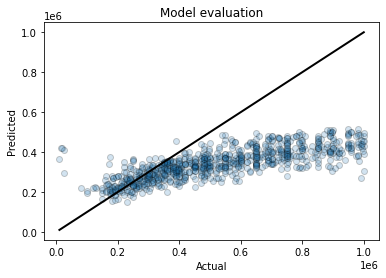

In [94]:
fig, ax = plt.subplots()
ax.scatter(y_test, preds, edgecolors=(0, 0, 0), alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k-", lw=2)
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.set_title("Model evaluation")
plt.show()

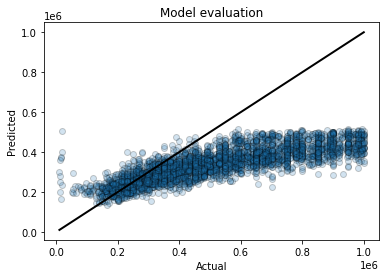

In [95]:
#train check
fig, ax = plt.subplots()
ax.scatter(y_train, xg_reg.predict(x_train), edgecolors=(0, 0, 0), alpha=0.2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "k-", lw=2)
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.set_title("Model evaluation")
plt.show()

### Hyper Parameter Tuning For XG_Boost

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
xgb1 = xgb.XGBRegressor()

In [98]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

In [99]:
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

In [100]:
xgb_grid.fit(x_train,
         y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[18:13:40] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                               

In [101]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.7199745071474811
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.7}


In [102]:
preds_hyper_xgb = xgb_grid.predict(x_test)

In [103]:
r2_xgb_hyper = r2_score(y_test, preds_hyper_xgb)

In [104]:
print(r2_xgb_hyper)

0.7322185503767764


In [105]:
mape_xgb_hyper = mean_absolute_percentage_error(y_test, preds_hyper_xgb)

In [106]:
print(mape_xgb_hyper)

0.3952970409254368


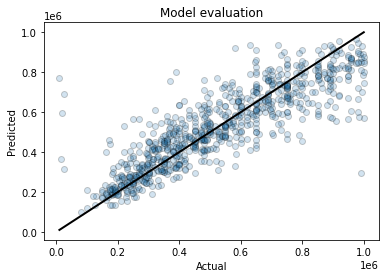

In [107]:
fig, ax = plt.subplots()
ax.scatter(y_test, preds_hyper_xgb, edgecolors=(0, 0, 0), alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k-", lw=2)
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.set_title("Model evaluation")
plt.show()

### CatBoost Regression

In [108]:
!pip install catboost


In [109]:
import catboost as ctb

In [110]:
model_CBR = ctb.CatBoostRegressor()

In [111]:
model_CBR = ctb.CatBoostRegressor()
model_CBR.fit(x_train, y_train)
print(model_CBR)

Learning rate set to 0.049176
0:	learn: 231724.4396530	total: 59.1ms	remaining: 59.1s
1:	learn: 226031.0017029	total: 60.3ms	remaining: 30.1s
2:	learn: 220631.8144863	total: 61.3ms	remaining: 20.4s
3:	learn: 215577.5504566	total: 62.4ms	remaining: 15.5s
4:	learn: 210904.8185234	total: 63.4ms	remaining: 12.6s
5:	learn: 206200.2191352	total: 64.4ms	remaining: 10.7s
6:	learn: 201900.1090782	total: 65.4ms	remaining: 9.28s
7:	learn: 198123.2281439	total: 66.5ms	remaining: 8.25s
8:	learn: 194271.8242670	total: 67.7ms	remaining: 7.46s
9:	learn: 190581.6924570	total: 68.6ms	remaining: 6.79s
10:	learn: 187086.3957847	total: 69.6ms	remaining: 6.26s
11:	learn: 184031.7021938	total: 70.6ms	remaining: 5.81s
12:	learn: 181068.5282410	total: 71.7ms	remaining: 5.45s
13:	learn: 178322.9096085	total: 72.7ms	remaining: 5.12s
14:	learn: 175667.7262441	total: 73.6ms	remaining: 4.83s
15:	learn: 173362.9139849	total: 74.9ms	remaining: 4.61s
16:	learn: 171265.9546435	total: 76.1ms	remaining: 4.4s
17:	learn: 1

165:	learn: 118163.5754439	total: 247ms	remaining: 1.24s
166:	learn: 117972.8173139	total: 248ms	remaining: 1.24s
167:	learn: 117872.7193617	total: 250ms	remaining: 1.24s
168:	learn: 117806.6729440	total: 251ms	remaining: 1.24s
169:	learn: 117779.8505185	total: 252ms	remaining: 1.23s
170:	learn: 117729.6018091	total: 253ms	remaining: 1.23s
171:	learn: 117636.9863716	total: 254ms	remaining: 1.22s
172:	learn: 117464.9173240	total: 255ms	remaining: 1.22s
173:	learn: 117441.1056429	total: 257ms	remaining: 1.22s
174:	learn: 117375.6259191	total: 258ms	remaining: 1.21s
175:	learn: 117275.4136707	total: 259ms	remaining: 1.21s
176:	learn: 117202.2299852	total: 260ms	remaining: 1.21s
177:	learn: 117085.9177411	total: 261ms	remaining: 1.21s
178:	learn: 116968.8488514	total: 262ms	remaining: 1.2s
179:	learn: 116798.4128188	total: 263ms	remaining: 1.2s
180:	learn: 116760.7530885	total: 265ms	remaining: 1.2s
181:	learn: 116669.8021192	total: 266ms	remaining: 1.19s
182:	learn: 116581.9061168	total: 

333:	learn: 105244.6454804	total: 436ms	remaining: 869ms
334:	learn: 105181.8642485	total: 437ms	remaining: 868ms
335:	learn: 105069.7445646	total: 438ms	remaining: 866ms
336:	learn: 105015.6895700	total: 439ms	remaining: 865ms
337:	learn: 104916.6738458	total: 441ms	remaining: 863ms
338:	learn: 104819.9593723	total: 442ms	remaining: 861ms
339:	learn: 104789.6382081	total: 443ms	remaining: 859ms
340:	learn: 104748.0438614	total: 444ms	remaining: 857ms
341:	learn: 104693.5394901	total: 445ms	remaining: 856ms
342:	learn: 104656.0183921	total: 446ms	remaining: 854ms
343:	learn: 104576.9988502	total: 447ms	remaining: 853ms
344:	learn: 104534.2589703	total: 448ms	remaining: 851ms
345:	learn: 104460.9405043	total: 449ms	remaining: 849ms
346:	learn: 104346.3185381	total: 450ms	remaining: 847ms
347:	learn: 104300.5112021	total: 451ms	remaining: 845ms
348:	learn: 104246.9783790	total: 452ms	remaining: 844ms
349:	learn: 104143.4372342	total: 453ms	remaining: 842ms
350:	learn: 104116.2859108	tota

508:	learn: 95527.4078878	total: 624ms	remaining: 602ms
509:	learn: 95499.3677553	total: 625ms	remaining: 601ms
510:	learn: 95453.2233305	total: 626ms	remaining: 599ms
511:	learn: 95417.3172281	total: 627ms	remaining: 598ms
512:	learn: 95355.2171064	total: 628ms	remaining: 596ms
513:	learn: 95299.1531943	total: 629ms	remaining: 595ms
514:	learn: 95243.7050724	total: 630ms	remaining: 593ms
515:	learn: 95161.5757735	total: 631ms	remaining: 592ms
516:	learn: 95101.2299166	total: 632ms	remaining: 590ms
517:	learn: 95075.2791431	total: 633ms	remaining: 589ms
518:	learn: 95014.4637022	total: 634ms	remaining: 588ms
519:	learn: 94946.5862231	total: 635ms	remaining: 586ms
520:	learn: 94862.0281141	total: 636ms	remaining: 585ms
521:	learn: 94851.7379204	total: 637ms	remaining: 583ms
522:	learn: 94794.8053463	total: 638ms	remaining: 582ms
523:	learn: 94699.1111203	total: 639ms	remaining: 581ms
524:	learn: 94639.0135306	total: 640ms	remaining: 579ms
525:	learn: 94634.6415316	total: 641ms	remaining

772:	learn: 85194.7947656	total: 950ms	remaining: 279ms
773:	learn: 85163.5648884	total: 951ms	remaining: 278ms
774:	learn: 85146.0327641	total: 953ms	remaining: 277ms
775:	learn: 85112.8720506	total: 954ms	remaining: 275ms
776:	learn: 85059.1087115	total: 955ms	remaining: 274ms
777:	learn: 85020.8188218	total: 956ms	remaining: 273ms
778:	learn: 84970.2390474	total: 957ms	remaining: 272ms
779:	learn: 84945.6776297	total: 958ms	remaining: 270ms
780:	learn: 84941.8965908	total: 959ms	remaining: 269ms
781:	learn: 84874.4151964	total: 960ms	remaining: 268ms
782:	learn: 84839.5930088	total: 962ms	remaining: 267ms
783:	learn: 84815.6913521	total: 963ms	remaining: 265ms
784:	learn: 84783.3892773	total: 964ms	remaining: 264ms
785:	learn: 84747.7040325	total: 965ms	remaining: 263ms
786:	learn: 84674.4250801	total: 966ms	remaining: 261ms
787:	learn: 84636.5005278	total: 967ms	remaining: 260ms
788:	learn: 84610.3073724	total: 968ms	remaining: 259ms
789:	learn: 84583.4002419	total: 969ms	remaining

945:	learn: 80063.0621870	total: 1.14s	remaining: 65ms
946:	learn: 80046.8955335	total: 1.14s	remaining: 63.8ms
947:	learn: 80015.5086212	total: 1.14s	remaining: 62.6ms
948:	learn: 79997.6237782	total: 1.14s	remaining: 61.4ms
949:	learn: 79968.8656043	total: 1.14s	remaining: 60.2ms
950:	learn: 79958.8581352	total: 1.14s	remaining: 59ms
951:	learn: 79939.4537105	total: 1.15s	remaining: 57.8ms
952:	learn: 79927.1699340	total: 1.15s	remaining: 56.5ms
953:	learn: 79896.7994755	total: 1.15s	remaining: 55.3ms
954:	learn: 79878.3890607	total: 1.15s	remaining: 54.1ms
955:	learn: 79865.0025021	total: 1.15s	remaining: 52.9ms
956:	learn: 79822.3264472	total: 1.15s	remaining: 51.7ms
957:	learn: 79785.8254671	total: 1.15s	remaining: 50.5ms
958:	learn: 79751.6148380	total: 1.15s	remaining: 49.3ms
959:	learn: 79719.9850017	total: 1.15s	remaining: 48.1ms
960:	learn: 79691.5789363	total: 1.16s	remaining: 46.9ms
961:	learn: 79649.4878588	total: 1.16s	remaining: 45.7ms
962:	learn: 79601.6030009	total: 1.

In [112]:
from sklearn import metrics

In [113]:
expected_y  = y_test
predicted_y = model_CBR.predict(x_test)

0.7213531660370938
0.1325351625321141


/Users/sirajussalekin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

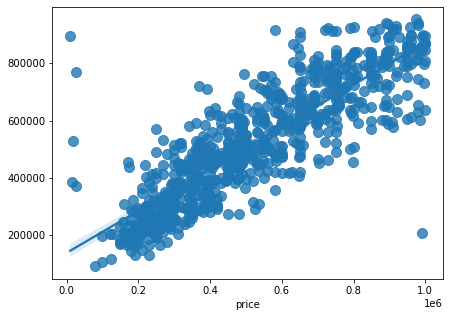

In [114]:
print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_log_error(expected_y, predicted_y))
    
plt.figure(figsize=(7,5))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})

### Catboost Hyper Parameter Tuning

In [115]:
model_CBR_hyper = ctb.CatBoostRegressor()

In [116]:
parameters = {'depth': [6,8,10],
            'learning_rate' : [0.01, 0.05, 0.1],
                'iterations'    : [30, 50, 100]}

In [117]:
grid_cbr_hyper = GridSearchCV(estimator=model_CBR_hyper, param_grid = parameters, cv = 2, n_jobs=-1)
grid_cbr_hyper.fit(x_train, y_train)

[18:13:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:13:31] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:13:35] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x

53:	learn: 105558.7361145	total: 205ms	remaining: 174ms
54:	learn: 105225.7778970	total: 208ms	remaining: 170ms
55:	learn: 104946.2721910	total: 211ms	remaining: 166ms
56:	learn: 104514.2612033	total: 214ms	remaining: 162ms
57:	learn: 104292.4734213	total: 218ms	remaining: 158ms
58:	learn: 103865.6422877	total: 221ms	remaining: 153ms
59:	learn: 103406.7849797	total: 224ms	remaining: 150ms
60:	learn: 102995.3967617	total: 228ms	remaining: 146ms
61:	learn: 102410.9132558	total: 231ms	remaining: 142ms
62:	learn: 102328.7589978	total: 233ms	remaining: 137ms
63:	learn: 101978.0807669	total: 236ms	remaining: 133ms
64:	learn: 101429.6190900	total: 239ms	remaining: 129ms
65:	learn: 101320.6541770	total: 242ms	remaining: 125ms
66:	learn: 100942.9839410	total: 245ms	remaining: 121ms
67:	learn: 100662.4420360	total: 250ms	remaining: 118ms
68:	learn: 100392.2714235	total: 255ms	remaining: 114ms
69:	learn: 99908.0478748	total: 261ms	remaining: 112ms
70:	learn: 99480.1311178	total: 265ms	remaining: 

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x7fc2d3641250>,
             n_jobs=-1,
             param_grid={'depth': [6, 8, 10], 'iterations': [30, 50, 100],
                         'learning_rate': [0.01, 0.05, 0.1]})

In [118]:
expected_y_hyper  = y_test
predicted_y_hyper = grid_cbr_hyper.predict(x_test)

0.702067988459179
0.13555946622799003


/Users/sirajussalekin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

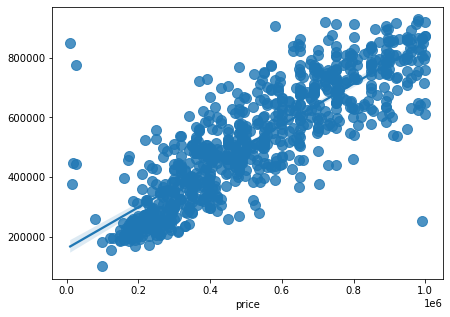

In [119]:
print(metrics.r2_score(expected_y_hyper, predicted_y_hyper))
print(metrics.mean_squared_log_error(expected_y_hyper, predicted_y_hyper))
    
plt.figure(figsize=(7,5))
sns.regplot(expected_y_hyper, predicted_y_hyper, fit_reg=True, scatter_kws={"s": 100})

In [120]:
df

,adm-fees,garage-places,price,rooms,square-foot,neighborhood,latitude,longitude
0,470.00000,1.0,330000.0,1.0,40.0,91,-19.936415,-43.953396
1,594.12381,1.0,480000.0,2.0,55.0,33,-18.864776,-41.121777
2,500.00000,1.0,450000.0,3.0,87.0,31,-19.886147,-44.004236
3,594.12381,2.0,861748.0,2.0,65.5,33,-18.864776,-41.121777
4,750.00000,2.0,549900.0,4.0,153.0,143,-19.947351,-43.943470
...,...,...,...,...,...,...,...,...
3982,200.00000,0.0,220000.0,1.0,45.0,17,-19.974455,-43.977699
3983,340.00000,2.0,560000.0,3.0,92.0,106,-19.945428,-43.970988
3984,200.00000,1.0,440000.0,3.0,90.0,7,-19.979915,-44.026007
3985,10.00000,2.0,500000.0,3.0,80.0,72,-19.840904,-43.956037


In [121]:
x_train

,adm-fees,garage-places,rooms,square-foot,neighborhood,latitude,longitude
2280,3653.534562,2.0,0.0,21.0,17,-19.974800,-43.977059
1642,10.000000,2.0,3.0,126.0,88,-19.805021,-43.975971
3087,62.307692,2.0,3.0,108.0,41,-19.826221,-43.992207
791,94.235294,1.0,2.0,61.0,138,-19.832725,-43.987904
3625,1100.000000,3.0,4.0,156.0,134,-19.921327,-43.914988
...,...,...,...,...,...,...,...
3313,650.000000,2.0,2.0,83.0,17,-19.967170,-43.970112
3325,2535.073864,1.0,1.0,82.0,129,-19.911428,-43.925375
1414,642.000000,2.0,2.0,77.0,145,-19.862486,-43.961418
1691,720.000000,1.0,2.0,70.0,10,-19.974204,-43.939516


### Now Removing Longitude & Latitude From Data Set

In [122]:
df.drop(columns=['latitude', 'longitude'], inplace=True)

In [123]:
df

,adm-fees,garage-places,price,rooms,square-foot,neighborhood
0,470.00000,1.0,330000.0,1.0,40.0,91
1,594.12381,1.0,480000.0,2.0,55.0,33
2,500.00000,1.0,450000.0,3.0,87.0,31
3,594.12381,2.0,861748.0,2.0,65.5,33
4,750.00000,2.0,549900.0,4.0,153.0,143
...,...,...,...,...,...,...
3982,200.00000,0.0,220000.0,1.0,45.0,17
3983,340.00000,2.0,560000.0,3.0,92.0,106
3984,200.00000,1.0,440000.0,3.0,90.0,7
3985,10.00000,2.0,500000.0,3.0,80.0,72


In [124]:
# using the train test split function
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['price']),df['price'], random_state=12, test_size=0.2, shuffle=True)

In [125]:
regr = LinearRegression()

In [126]:
regr.fit(x_train, y_train)
print(regr.score(x_test, y_test))

0.18525649165425084


In [127]:
y_pred = regr.predict(x_test)

In [128]:
r2 = r2_score(y_test, y_pred)

In [129]:
print(r2)

0.18525649165425084


In [130]:
mape = mean_absolute_percentage_error(y_test, y_pred)

In [131]:
print(mape)

0.6644376605405047


/Users/sirajussalekin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

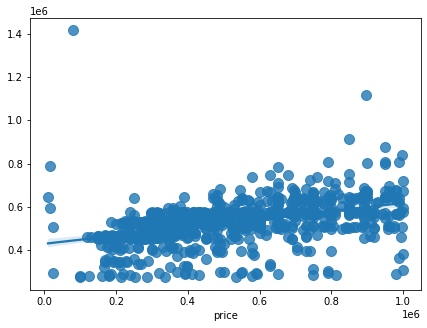

In [132]:
plt.figure(figsize=(7,5))
sns.regplot(y_test, y_pred, fit_reg=True, scatter_kws={"s": 100})

### XGBOOST

In [133]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)

In [134]:
xg_reg.fit(x_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=10, ...)

In [135]:
preds = xg_reg.predict(x_test)

In [136]:
r2_xgb = r2_score(y_test, preds)

In [137]:
print(r2_xgb)

-0.2816128162434519


In [138]:
mape_xgb = mean_absolute_percentage_error(y_test, preds)

In [139]:
print(mape_xgb)

0.49678132609792164


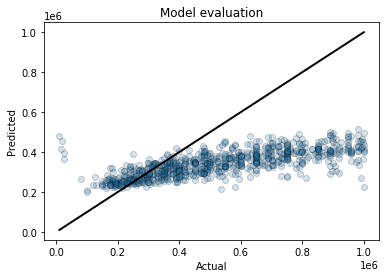

In [140]:
fig, ax = plt.subplots()
ax.scatter(y_test, preds, edgecolors=(0, 0, 0), alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k-", lw=2)
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.set_title("Model evaluation")
plt.show()

### Now Catboost

In [141]:
model_CBR = ctb.CatBoostRegressor()

In [142]:
model_CBR = ctb.CatBoostRegressor()
model_CBR.fit(x_train, y_train)
print(model_CBR)

Learning rate set to 0.049176
0:	learn: 231686.1027070	total: 946us	remaining: 946ms
1:	learn: 225920.2829646	total: 2.31ms	remaining: 1.15s
2:	learn: 220552.0041463	total: 3.28ms	remaining: 1.09s
3:	learn: 215504.2605474	total: 4.12ms	remaining: 1.03s
4:	learn: 210825.9808520	total: 4.91ms	remaining: 977ms
5:	learn: 206654.3194206	total: 5.76ms	remaining: 955ms
6:	learn: 202373.7795232	total: 6.78ms	remaining: 961ms
7:	learn: 198486.9968228	total: 7.57ms	remaining: 939ms
8:	learn: 195021.3645914	total: 8.45ms	remaining: 930ms
9:	learn: 191570.9577860	total: 9.84ms	remaining: 974ms
10:	learn: 188627.3620147	total: 10.6ms	remaining: 954ms
11:	learn: 185690.5272958	total: 11.5ms	remaining: 947ms
12:	learn: 182993.3927637	total: 12.6ms	remaining: 954ms
13:	learn: 180452.5808190	total: 13.9ms	remaining: 976ms
14:	learn: 178108.0892905	total: 15.1ms	remaining: 989ms
15:	learn: 175719.7146607	total: 15.9ms	remaining: 976ms
16:	learn: 173560.2943408	total: 17.3ms	remaining: 1s
17:	learn: 1717

181:	learn: 125578.8651202	total: 188ms	remaining: 843ms
182:	learn: 125418.8264539	total: 189ms	remaining: 843ms
183:	learn: 125355.1706432	total: 190ms	remaining: 840ms
184:	learn: 125281.8153883	total: 191ms	remaining: 840ms
185:	learn: 125260.9617502	total: 191ms	remaining: 838ms
186:	learn: 125139.0591935	total: 193ms	remaining: 838ms
187:	learn: 125078.0929268	total: 194ms	remaining: 838ms
188:	learn: 124961.2850480	total: 195ms	remaining: 836ms
189:	learn: 124909.4111569	total: 196ms	remaining: 834ms
190:	learn: 124759.1377110	total: 197ms	remaining: 832ms
191:	learn: 124718.0952619	total: 197ms	remaining: 830ms
192:	learn: 124652.0006062	total: 198ms	remaining: 828ms
193:	learn: 124597.9938259	total: 199ms	remaining: 826ms
194:	learn: 124525.2745404	total: 200ms	remaining: 824ms
195:	learn: 124463.4117239	total: 201ms	remaining: 823ms
196:	learn: 124417.1100437	total: 201ms	remaining: 821ms
197:	learn: 124345.4246472	total: 202ms	remaining: 820ms
198:	learn: 124269.4413995	tota

368:	learn: 113010.7260777	total: 375ms	remaining: 642ms
369:	learn: 112986.0547441	total: 376ms	remaining: 641ms
370:	learn: 112892.8636844	total: 377ms	remaining: 640ms
371:	learn: 112798.6949141	total: 378ms	remaining: 638ms
372:	learn: 112739.8555567	total: 379ms	remaining: 637ms
373:	learn: 112710.5476155	total: 380ms	remaining: 636ms
374:	learn: 112664.9817198	total: 380ms	remaining: 634ms
375:	learn: 112579.5493669	total: 382ms	remaining: 633ms
376:	learn: 112508.3125597	total: 382ms	remaining: 632ms
377:	learn: 112482.5219360	total: 383ms	remaining: 631ms
378:	learn: 112436.3149914	total: 384ms	remaining: 630ms
379:	learn: 112332.9022321	total: 385ms	remaining: 628ms
380:	learn: 112300.2920137	total: 386ms	remaining: 628ms
381:	learn: 112275.5318843	total: 387ms	remaining: 627ms
382:	learn: 112191.3918184	total: 389ms	remaining: 626ms
383:	learn: 112094.6758691	total: 390ms	remaining: 625ms
384:	learn: 112022.3040439	total: 391ms	remaining: 624ms
385:	learn: 111982.6653498	tota

556:	learn: 104356.8494483	total: 563ms	remaining: 448ms
557:	learn: 104305.1904997	total: 565ms	remaining: 447ms
558:	learn: 104259.6376857	total: 565ms	remaining: 446ms
559:	learn: 104227.6008878	total: 566ms	remaining: 445ms
560:	learn: 104190.3448881	total: 567ms	remaining: 444ms
561:	learn: 104166.7121205	total: 568ms	remaining: 443ms
562:	learn: 104143.8740808	total: 569ms	remaining: 442ms
563:	learn: 104109.3999817	total: 570ms	remaining: 441ms
564:	learn: 104090.1561446	total: 571ms	remaining: 439ms
565:	learn: 104025.7669629	total: 572ms	remaining: 438ms
566:	learn: 104006.2554552	total: 572ms	remaining: 437ms
567:	learn: 103974.7114090	total: 573ms	remaining: 436ms
568:	learn: 103960.1911590	total: 574ms	remaining: 435ms
569:	learn: 103927.9288167	total: 575ms	remaining: 434ms
570:	learn: 103893.0112702	total: 576ms	remaining: 433ms
571:	learn: 103834.5581789	total: 577ms	remaining: 432ms
572:	learn: 103791.9256998	total: 578ms	remaining: 431ms
573:	learn: 103755.0543378	tota

747:	learn: 97875.5272231	total: 753ms	remaining: 254ms
748:	learn: 97867.3404587	total: 754ms	remaining: 253ms
749:	learn: 97846.0251854	total: 755ms	remaining: 252ms
750:	learn: 97804.1788860	total: 756ms	remaining: 251ms
751:	learn: 97764.0163131	total: 757ms	remaining: 250ms
752:	learn: 97745.4872251	total: 758ms	remaining: 249ms
753:	learn: 97691.3886245	total: 759ms	remaining: 247ms
754:	learn: 97643.6879740	total: 760ms	remaining: 246ms
755:	learn: 97608.2079462	total: 761ms	remaining: 245ms
756:	learn: 97575.1664735	total: 762ms	remaining: 245ms
757:	learn: 97572.7145958	total: 763ms	remaining: 244ms
758:	learn: 97557.8935424	total: 764ms	remaining: 243ms
759:	learn: 97532.9608288	total: 765ms	remaining: 241ms
760:	learn: 97509.1892107	total: 765ms	remaining: 240ms
761:	learn: 97489.1443156	total: 766ms	remaining: 239ms
762:	learn: 97469.8935207	total: 767ms	remaining: 238ms
763:	learn: 97453.7600806	total: 768ms	remaining: 237ms
764:	learn: 97433.5121307	total: 769ms	remaining

943:	learn: 92679.1512203	total: 942ms	remaining: 55.9ms
944:	learn: 92649.7852145	total: 943ms	remaining: 54.9ms
945:	learn: 92638.0927162	total: 944ms	remaining: 53.9ms
946:	learn: 92603.5574643	total: 945ms	remaining: 52.9ms
947:	learn: 92565.0343013	total: 946ms	remaining: 51.9ms
948:	learn: 92543.7526707	total: 947ms	remaining: 50.9ms
949:	learn: 92535.1685741	total: 948ms	remaining: 49.9ms
950:	learn: 92518.7953138	total: 949ms	remaining: 48.9ms
951:	learn: 92483.7849621	total: 950ms	remaining: 47.9ms
952:	learn: 92461.2410669	total: 951ms	remaining: 46.9ms
953:	learn: 92452.0912883	total: 952ms	remaining: 45.9ms
954:	learn: 92424.5413626	total: 953ms	remaining: 44.9ms
955:	learn: 92401.2974744	total: 954ms	remaining: 43.9ms
956:	learn: 92367.4713879	total: 955ms	remaining: 42.9ms
957:	learn: 92334.1783750	total: 956ms	remaining: 41.9ms
958:	learn: 92307.8670668	total: 957ms	remaining: 40.9ms
959:	learn: 92290.4546683	total: 959ms	remaining: 39.9ms
960:	learn: 92253.6570829	total

In [143]:
expected_y  = y_test
predicted_y = model_CBR.predict(x_test)

0.6732255525966684
0.1457259307716233


/Users/sirajussalekin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

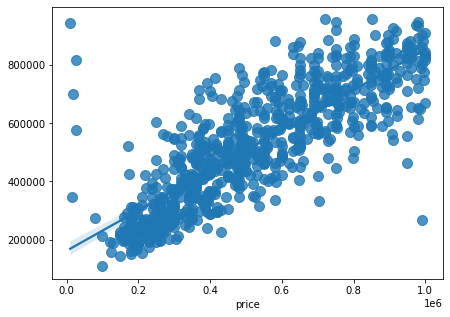

0:	learn: 227504.4147348	total: 66ms	remaining: 1.91s
1:	learn: 216288.4093604	total: 72.1ms	remaining: 1.01s
2:	learn: 206358.3843431	total: 75ms	remaining: 675ms
3:	learn: 197465.4502863	total: 78ms	remaining: 507ms
4:	learn: 190319.4530840	total: 81.3ms	remaining: 406ms
5:	learn: 183551.5845527	total: 82.3ms	remaining: 329ms
6:	learn: 177660.2539621	total: 85.4ms	remaining: 280ms
7:	learn: 173389.5611528	total: 87.3ms	remaining: 240ms
8:	learn: 168658.4611967	total: 91.4ms	remaining: 213ms
9:	learn: 164170.9742135	total: 92.4ms	remaining: 185ms
10:	learn: 160490.2792553	total: 95ms	remaining: 164ms
11:	learn: 157140.7788219	total: 99.1ms	remaining: 149ms
12:	learn: 154361.0092894	total: 100ms	remaining: 131ms
13:	learn: 151938.6187758	total: 101ms	remaining: 115ms
14:	learn: 150239.3397130	total: 102ms	remaining: 102ms
15:	learn: 148622.3380305	total: 103ms	remaining: 89.9ms
16:	learn: 146742.7054391	total: 104ms	remaining: 79.3ms
17:	learn: 145003.9881218	total: 107ms	remaining: 71

0:	learn: 234299.9280587	total: 66.9ms	remaining: 1.94s
1:	learn: 233130.2551418	total: 67.9ms	remaining: 951ms
2:	learn: 231937.0641236	total: 68.8ms	remaining: 619ms
3:	learn: 230845.6971164	total: 69.7ms	remaining: 453ms
4:	learn: 229704.6925395	total: 73.4ms	remaining: 367ms
5:	learn: 228533.7919264	total: 81.5ms	remaining: 326ms
6:	learn: 227428.4182280	total: 82.5ms	remaining: 271ms
7:	learn: 226447.6952726	total: 83.9ms	remaining: 231ms
8:	learn: 225357.1756190	total: 85.8ms	remaining: 200ms
9:	learn: 224326.0962725	total: 97.9ms	remaining: 196ms
10:	learn: 223281.0256377	total: 104ms	remaining: 179ms
11:	learn: 222220.8550653	total: 105ms	remaining: 157ms
12:	learn: 221150.7350718	total: 106ms	remaining: 138ms
13:	learn: 220180.4446065	total: 108ms	remaining: 124ms
14:	learn: 219177.5621316	total: 109ms	remaining: 109ms
15:	learn: 218276.1879594	total: 114ms	remaining: 99.6ms
16:	learn: 217237.4763551	total: 115ms	remaining: 87.8ms
17:	learn: 216275.8264508	total: 116ms	remaini

0:	learn: 229598.8413952	total: 72.9ms	remaining: 2.11s
1:	learn: 224040.0404529	total: 79ms	remaining: 1.1s
2:	learn: 218900.0744851	total: 80.3ms	remaining: 723ms
3:	learn: 214336.2775551	total: 82.5ms	remaining: 537ms
4:	learn: 209773.4512652	total: 84.4ms	remaining: 422ms
5:	learn: 205238.8300355	total: 88.8ms	remaining: 355ms
6:	learn: 201328.1627476	total: 91.3ms	remaining: 300ms
7:	learn: 197993.7940853	total: 94.4ms	remaining: 260ms
8:	learn: 194396.7897296	total: 95.6ms	remaining: 223ms
9:	learn: 190797.0600946	total: 108ms	remaining: 215ms
10:	learn: 187790.7051184	total: 109ms	remaining: 188ms
11:	learn: 184769.4250368	total: 110ms	remaining: 165ms
12:	learn: 182136.0889363	total: 113ms	remaining: 148ms
13:	learn: 179631.9628668	total: 115ms	remaining: 131ms
14:	learn: 177325.2318380	total: 118ms	remaining: 118ms
15:	learn: 174902.2332792	total: 119ms	remaining: 104ms
16:	learn: 172431.2009611	total: 120ms	remaining: 91.9ms
17:	learn: 170540.5386576	total: 121ms	remaining: 8

0:	learn: 238802.8469585	total: 56.2ms	remaining: 1.63s
1:	learn: 237514.0094549	total: 57.7ms	remaining: 808ms
2:	learn: 236230.1481515	total: 66.5ms	remaining: 598ms
3:	learn: 234983.1307447	total: 67.5ms	remaining: 439ms
4:	learn: 233795.6813339	total: 68.3ms	remaining: 342ms
5:	learn: 232559.8908412	total: 69.2ms	remaining: 277ms
6:	learn: 231325.9374699	total: 70.4ms	remaining: 231ms
7:	learn: 230196.5208067	total: 71.3ms	remaining: 196ms
8:	learn: 229006.5317683	total: 78.9ms	remaining: 184ms
9:	learn: 227850.1295412	total: 80.1ms	remaining: 160ms
10:	learn: 226692.3528003	total: 82ms	remaining: 142ms
11:	learn: 225555.7179063	total: 83ms	remaining: 124ms
12:	learn: 224434.1408159	total: 84ms	remaining: 110ms
13:	learn: 223385.1418749	total: 85.1ms	remaining: 97.2ms
14:	learn: 222344.3847803	total: 86.1ms	remaining: 86.1ms
15:	learn: 221317.7151518	total: 87ms	remaining: 76.2ms
16:	learn: 220201.6252254	total: 92.6ms	remaining: 70.8ms
17:	learn: 219173.4908883	total: 93.7ms	remai

0:	learn: 233721.1631253	total: 63.1ms	remaining: 1.83s
1:	learn: 227649.0966086	total: 72.8ms	remaining: 1.02s
2:	learn: 221895.3865148	total: 74.2ms	remaining: 668ms
3:	learn: 216544.7623256	total: 78.9ms	remaining: 513ms
4:	learn: 211746.9929859	total: 79.9ms	remaining: 399ms
5:	learn: 206949.8318178	total: 84.8ms	remaining: 339ms
6:	learn: 202535.1894439	total: 85.8ms	remaining: 282ms
7:	learn: 198934.3557997	total: 86.5ms	remaining: 238ms
8:	learn: 194890.2284528	total: 95.7ms	remaining: 223ms
9:	learn: 191127.8004300	total: 97ms	remaining: 194ms
10:	learn: 187764.0726868	total: 103ms	remaining: 179ms
11:	learn: 184276.2539714	total: 106ms	remaining: 159ms
12:	learn: 181137.4169197	total: 109ms	remaining: 142ms
13:	learn: 178612.9142221	total: 110ms	remaining: 125ms
14:	learn: 176082.4934239	total: 111ms	remaining: 111ms
15:	learn: 173538.0577190	total: 112ms	remaining: 97.7ms
16:	learn: 171136.7274635	total: 113ms	remaining: 86.1ms
17:	learn: 169083.2561352	total: 113ms	remaining

0:	learn: 238802.8469585	total: 68.3ms	remaining: 3.34s
1:	learn: 237514.0094549	total: 69.6ms	remaining: 1.67s
2:	learn: 236230.1481515	total: 70.6ms	remaining: 1.11s
3:	learn: 234983.1307447	total: 71.5ms	remaining: 822ms
4:	learn: 233795.6813339	total: 72.3ms	remaining: 651ms
5:	learn: 232559.8908412	total: 73.2ms	remaining: 537ms
6:	learn: 231325.9374699	total: 77ms	remaining: 473ms
7:	learn: 230196.5208067	total: 79.6ms	remaining: 418ms
8:	learn: 229006.5317683	total: 86.7ms	remaining: 395ms
9:	learn: 227850.1295412	total: 87.7ms	remaining: 351ms
10:	learn: 226692.3528003	total: 88.6ms	remaining: 314ms
11:	learn: 225555.7179063	total: 89.6ms	remaining: 284ms
12:	learn: 224434.1408159	total: 92.2ms	remaining: 263ms
13:	learn: 223385.1418749	total: 94.6ms	remaining: 243ms
14:	learn: 222344.3847803	total: 95.7ms	remaining: 223ms
15:	learn: 221317.7151518	total: 96.6ms	remaining: 205ms
16:	learn: 220201.6252254	total: 100ms	remaining: 195ms
17:	learn: 219173.4908883	total: 101ms	remai

In [144]:
print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_log_error(expected_y, predicted_y))
    
plt.figure(figsize=(7,5))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})

### Hyper Tuned XGBoost

In [145]:
xgb1 = xgb.XGBRegressor()

In [146]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

In [147]:
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

In [148]:
xgb_grid.fit(x_train,
         y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[18:28:12] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                               

In [149]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.6823224635419348
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.7}
[18:27:58] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:28:02] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some param

In [150]:
expected_y  = y_test
predicted_y = xgb_grid.predict(x_test)

In [151]:
print(metrics.mean_squared_log_error(expected_y, predicted_y))

0.13973179925931545


### without longitude and Latitude, all the model performs poorly